#OPTION 2 : STITCH IMAGE AND DETECT PEOPLE 

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
#Read the images from your directory
dim=(540,480)
left=cv2.imread('A.jpg',cv2.IMREAD_COLOR)
left=cv2.resize(left,dim,interpolation = cv2.INTER_AREA)   #ReSize to (1024,768)
right=cv2.imread('B.jpg',cv2.IMREAD_COLOR)
right=cv2.resize(right,dim,interpolation = cv2.INTER_AREA) #ReSize to (1024,768)

images=[]
images.append(left)
images.append(right)

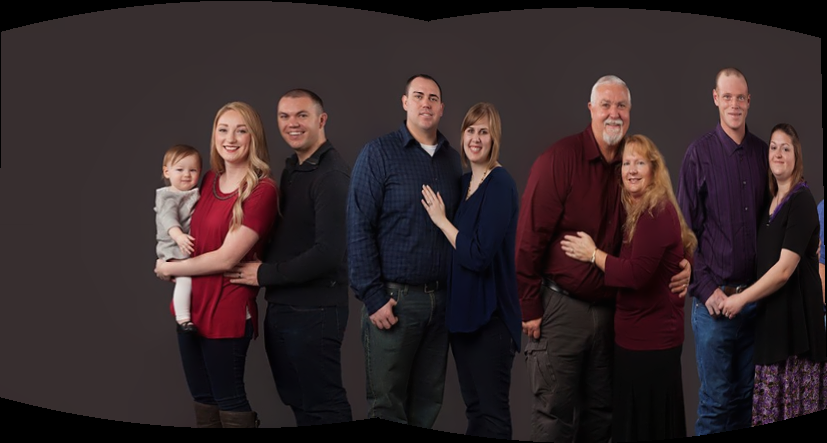

In [ ]:
#stitcher = cv2.createStitcher()
stitcher = cv2.Stitcher.create()
ret,pano = stitcher.stitch(images)

if ret==cv2.STITCHER_OK:
    cv2_imshow(pano)
    cv2.waitKey()
    cv2.destroyAllWindows()
else:
    print("Error during Stitching")

In [ ]:
cv2.imwrite('stich.png',pano)
st = cv2.imread('stich.png')
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

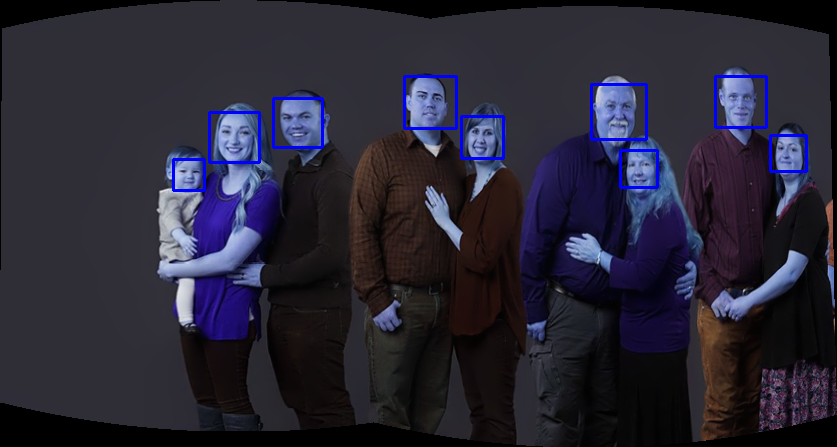

In [ ]:
image = cv2.imread('stich.png')
fix_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
faces = face_classifier.detectMultiScale(image, 1.2, 5)
if faces is ():
  print('No face detected')

  def detect_face(fix_img):
    face_rects = face_classifier.detectMultiScale(fix_img)
    
    for (x, y, w, h) in face_rects:
      cv2.rectangle(fix_img, (x,y), (x+w,y+h), (255,0,0), 2)
    
    return fix_img
result = detect_face(fix_img)
cv2_imshow(result)